<a href="https://colab.research.google.com/github/anirudhawagh/Technohack_Task1/blob/main/TechnohackTask1_byAniruddhawagh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Techohack Intership Task 1

#### **Project Objective** - Clean a dataset by removing missing values and outliers
      

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import ast

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
dataset ='/content/drive/MyDrive/Task1 dataset.csv'
ds =pd.read_csv(dataset)

In [ ]:
# Dataset First Look
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Dataset Rows & Columns count
print(ds.index)
print('\n')
print(ds.columns)

RangeIndex(start=0, stop=891, step=1)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# Dataset Info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
ds.shape

(891, 12)

In [ ]:
# Check for missing values
missing_values = ds.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:

# Step 1: Get the missing column names and their respective missing percentages
missing = ds.columns[ds.isnull().any()].tolist()
missing_percentages = round(ds[missing].isnull().mean() * 100, 2)

# Step 2: Create a DataFrame to store the missing information
missing_df = pd.DataFrame({'Missing Count': ds[missing].isnull().sum(), 'Missing Percentage': missing_percentages})

# Print the missing information for columns with missing values
print(missing_df)

          Missing Count  Missing Percentage
Age                 177               19.87
Cabin               687               77.10
Embarked              2                0.22


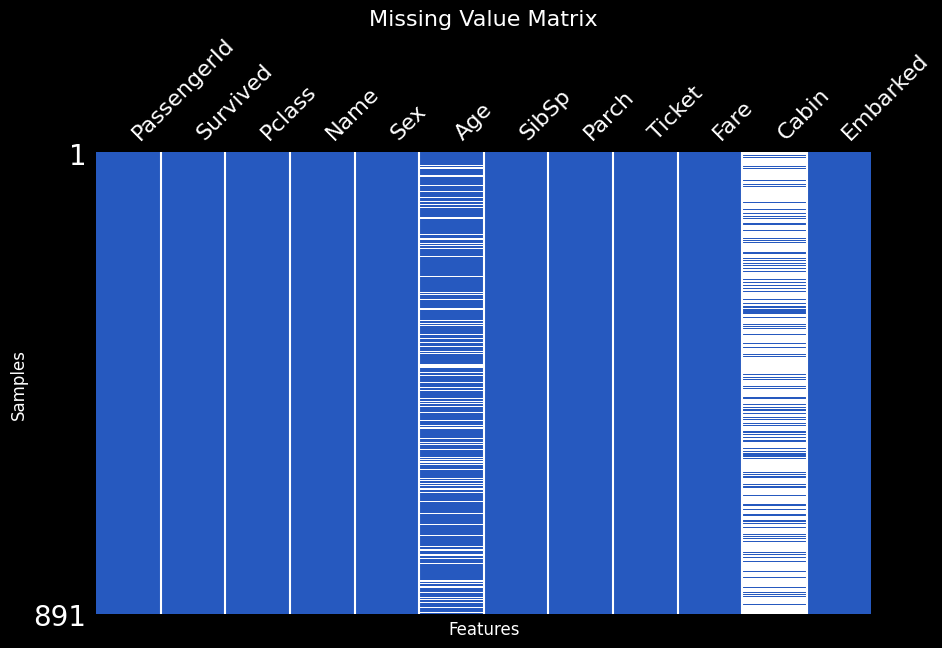

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt


# Set a dark background style for the plot
plt.style.use('dark_background')

# Create the missing value matrix plot with blue color
msno.matrix(ds, figsize=(10, 6), sparkline=False, color=(0.15, 0.35, 0.75))

# Customize plot
plt.title('Missing Value Matrix', fontsize=16, color='white')
plt.xlabel('Features', fontsize=12, color='white')
plt.ylabel('Samples', fontsize=12, color='white')

# Show the plot
plt.show()


In [ ]:
#Handle the missing values
numerical_columns = ds.select_dtypes(include=['int64', 'float64']).columns
ds[numerical_columns] = ds[numerical_columns].fillna(ds[numerical_columns].mean())

categorical_columns = ds.select_dtypes(include='object').columns
ds[categorical_columns] = ds[categorical_columns].fillna('Unknown')

# Chcek if any missing value is left after handling
print(ds.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
ds.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


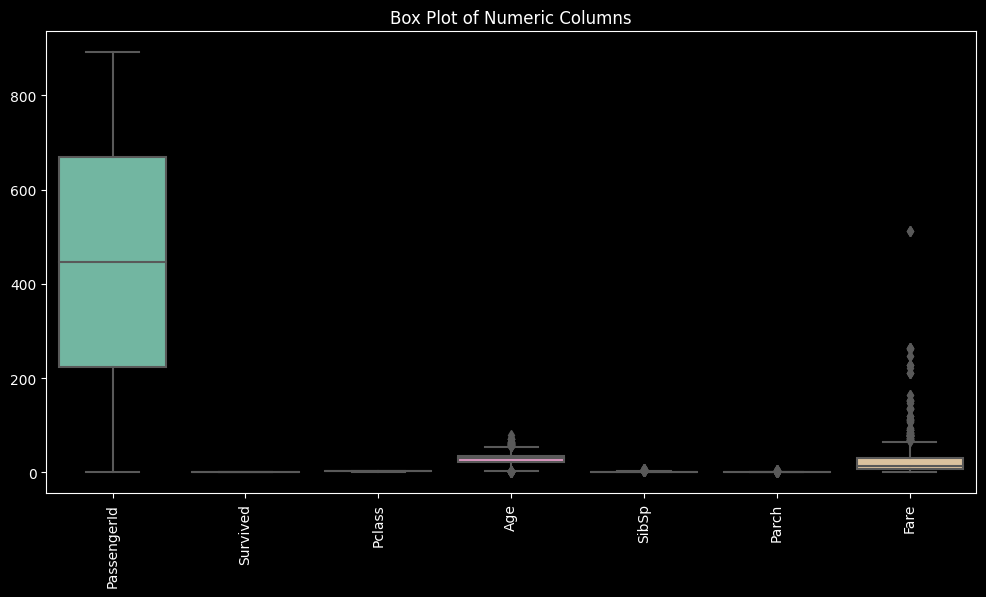

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ds.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns, orient="v", palette="Set2")  # Use "v" for vertical orientation
plt.title("Box Plot of Numeric Columns")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


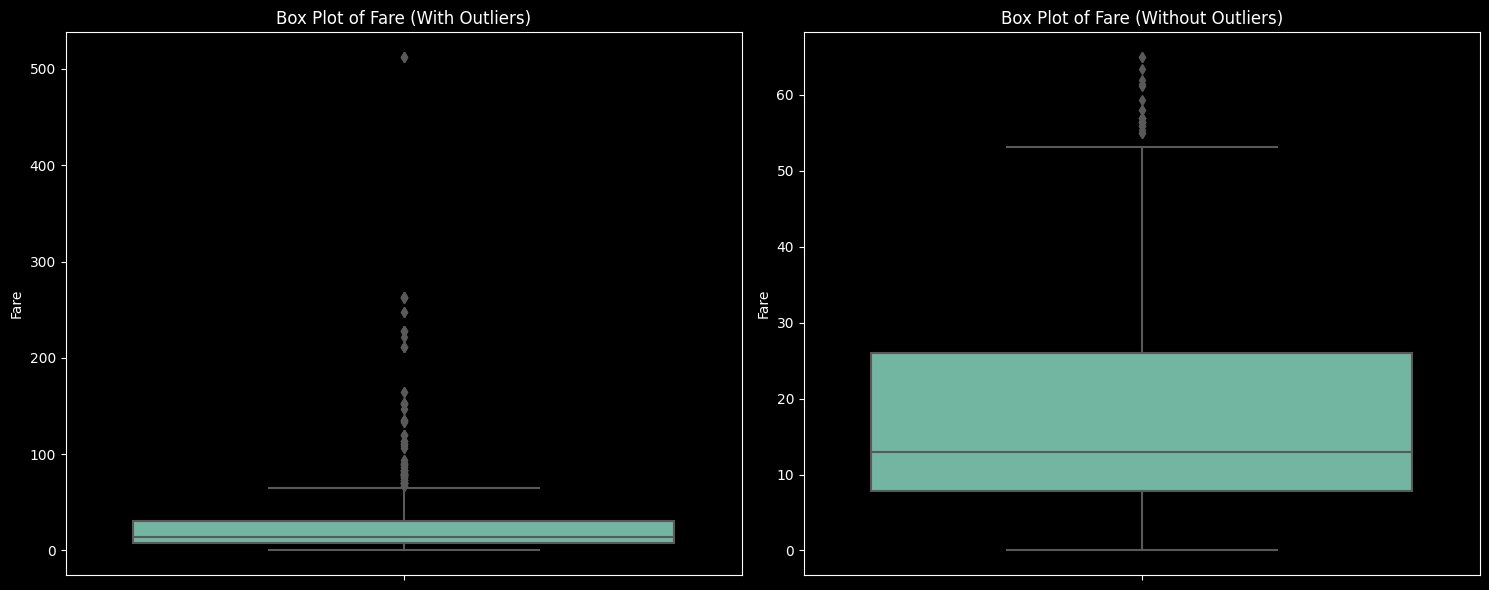

Original dataset shape: (891, 12)
Dataset shape after removing outliers from Fare: (775, 12)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Define the column name
column_name = "Fare"

# Calculate the IQR (Interquartile Range) for the Fare column
Q1 = ds[column_name].quantile(0.25)
Q3 = ds[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter the dataset to exclude outliers from the Fare column
ds_no_outliers = ds[(ds[column_name] >= lower_bound) & (ds[column_name] <= upper_bound)]

# Calculate and print the dataset shapes
original_shape = ds.shape
no_outliers_shape = ds_no_outliers.shape

# Create a figure with two subplots (one for each version)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot with outliers
sns.boxplot(y=ds[column_name], orient="v", palette="Set2", ax=axes[0])
axes[0].set_title(f"Box Plot of {column_name} (With Outliers)")
axes[0].set_ylabel(column_name)

# Box plot without outliers
sns.boxplot(y=ds_no_outliers[column_name], orient="v", palette="Set2", ax=axes[1])
axes[1].set_title(f"Box Plot of {column_name} (Without Outliers)")
axes[1].set_ylabel(column_name)

# Show the plots
plt.tight_layout()
plt.show()

# Print dataset shapes
print(f"Original dataset shape: {original_shape}")
print(f"Dataset shape after removing outliers from {column_name}: {no_outliers_shape}")


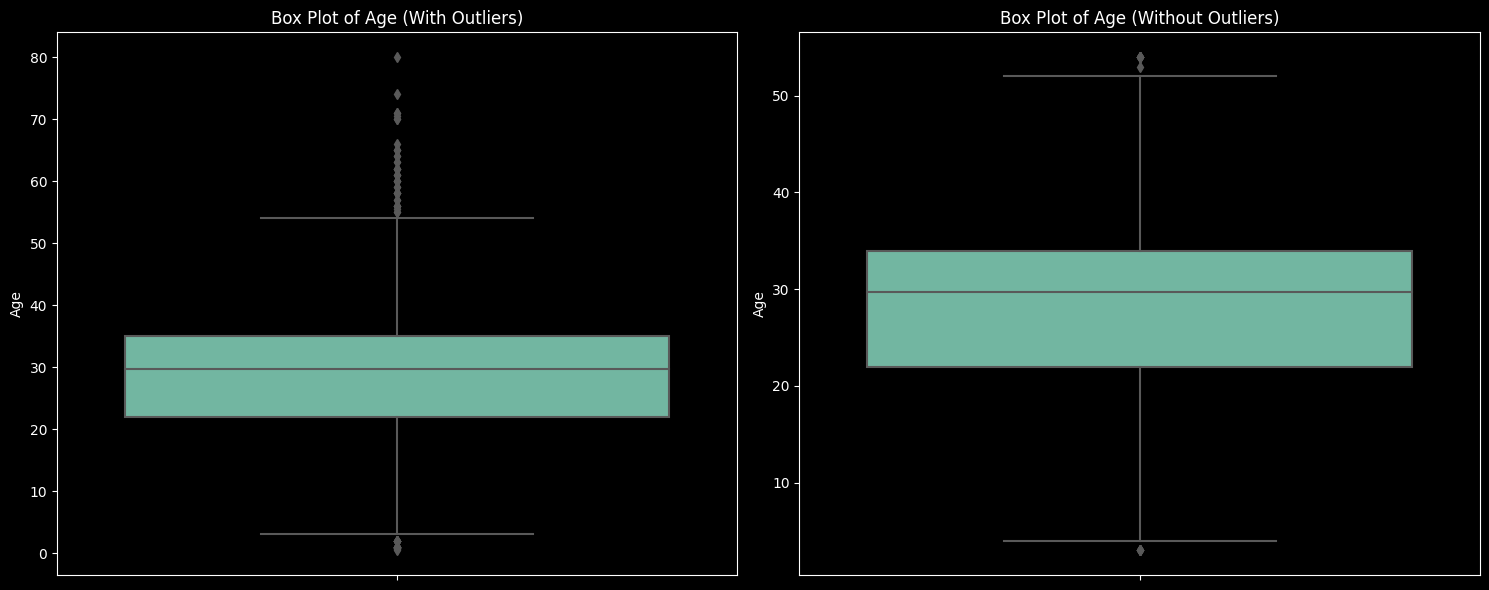

Original dataset shape: (891, 12)
Dataset shape after removing outliers from Age: (825, 12)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the column name
column_name = "Age"

# Calculate the IQR (Interquartile Range) for the Age column
Q1 = ds[column_name].quantile(0.25)
Q3 = ds[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter the dataset to exclude outliers from the Age column
ds_no_outliers = ds[(ds[column_name] >= lower_bound) & (ds[column_name] <= upper_bound)]

# Calculate and print the dataset shapes
original_shape = ds.shape
no_outliers_shape = ds_no_outliers.shape

# Create a figure with two subplots (one for each version)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot with outliers
sns.boxplot(y=ds[column_name], orient="v", palette="Set2", ax=axes[0])
axes[0].set_title(f"Box Plot of {column_name} (With Outliers)")
axes[0].set_ylabel(column_name)

# Box plot without outliers
sns.boxplot(y=ds_no_outliers[column_name], orient="v", palette="Set2", ax=axes[1])
axes[1].set_title(f"Box Plot of {column_name} (Without Outliers)")
axes[1].set_ylabel(column_name)

# Show the plots
plt.tight_layout()
plt.show()

# Print dataset shapes
print(f"Original dataset shape: {original_shape}")
print(f"Dataset shape after removing outliers from {column_name}: {no_outliers_shape}")


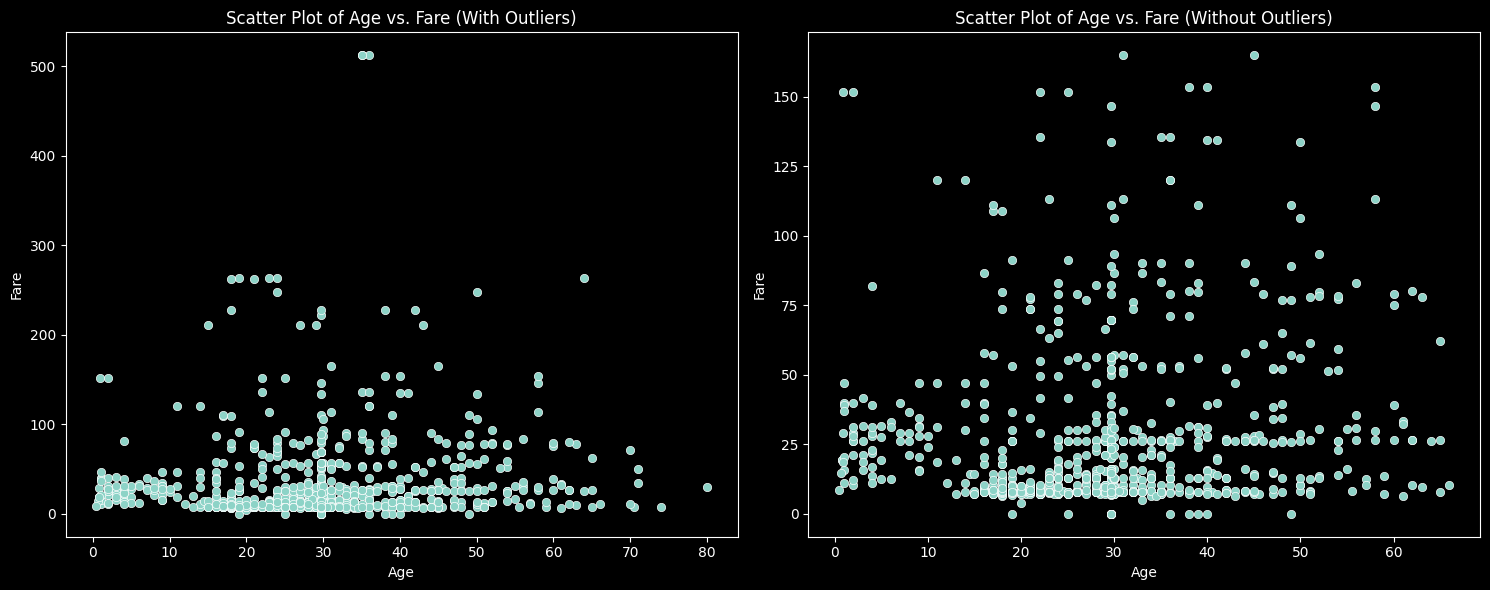

In [ ]:
# Create a figure with two subplots (one for each version)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot with outliers
sns.scatterplot(x="Age", y="Fare", data=ds, ax=axes[0])
axes[0].set_title("Scatter Plot of Age vs. Fare (With Outliers)")

# Define a z-score threshold for outliers (adjust as needed)
z_score_threshold = 3

# Calculate the z-scores for "Age" and "Fare" columns
z_scores = np.abs((ds[['Age', 'Fare']] - ds[['Age', 'Fare']].mean()) / ds[['Age', 'Fare']].std())

# Remove rows with outliers based on the z-score threshold
ds_no_outliers = ds[(z_scores < z_score_threshold).all(axis=1)]

# Scatter plot without outliers
sns.scatterplot(x="Age", y="Fare", data=ds_no_outliers, ax=axes[1])
axes[1].set_title("Scatter Plot of Age vs. Fare (Without Outliers)")

plt.tight_layout()
plt.show()


In [ ]:
# Define the filename and path for the cleaned dataset without outliers
output_filename = 'cleaned_dataset_no_outliers.csv'
output_path = '/content/drive/MyDrive/'  # Modify this path as per your requirements

# Save the cleaned dataset to a CSV file
ds_no_outliers.to_csv(output_path + output_filename, index=False)

print(f"Cleaned dataset without outliers saved to {output_path + output_filename}")


Cleaned dataset without outliers saved to /content/drive/MyDrive/cleaned_dataset_no_outliers.csv


**Conclusion**

In this project, I embarked on a mission to refine a dataset by addressing the challenges of missing values and outliers. My journey through this data exploration and cleansing process yielded several key accomplishments:

1. **Initial Data Exploration**: My quest began with a thorough examination of the dataset, aiming to understand its structure and peculiarities. This initial assessment uncovered two significant hurdles: missing values and outliers.

2. **Handling Missing Values**: I devised a systematic strategy to address missing values. For numeric columns, I employed the method of filling missing values with their respective mean values. Categorical columns, on the other hand, found resolution in being labeled as 'Unknown.' This approach ensured data completeness and retained the dataset's statistical integrity.

3. **Outlier Resolution**: Armed with the Interquartile Range (IQR) method, I set out to confront and eliminate outliers, focusing primarily on the "Age" and "Fare" columns. By effectively removing outliers, I honed the dataset for more precise analysis and modeling.

4. **Visual Insights**: Visualizations, particularly box plots, served as my visual companions throughout this journey. These graphical representations effectively illustrated the transformative impact of outlier removal on data distributions.

In conclusion, my efforts have transformed the dataset into a refined and enhanced asset, well-suited for advanced analysis and modeling. This project underscores the critical role of systematic data cleaning techniques in ensuring data quality and lays the foundation for meaningful insights and decision-making.